> 绘制NWP信息和风电数据的相关性程度图

> color='#1f77b4'; color='#ff7f0e'

In [1]:
import torch
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# 数据读取
df=torch.load('../Data/JSFD02/JSFD02')

In [3]:
start=1100; end=start+96*1
fig1=[[],[]]
fig1[0]=list(df['POWER'].iloc[start:end])
fig1[1]=list(df['SPEED'].iloc[start:end])

#### 画波形图

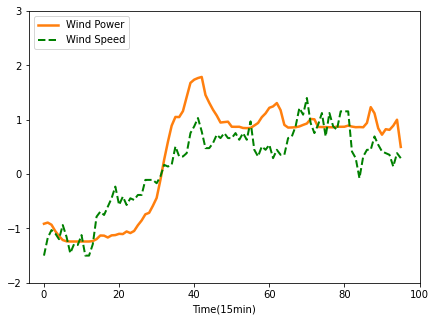

In [11]:
# 画波形图
plt.rcParams['figure.figsize']=(7, 5)
plt.plot(fig1[0],linewidth=2.5,label='Wind Power',color='#ff7f0e')
plt.plot(fig1[1],linewidth=2,linestyle='--',label='Wind Speed',color='g')
plt.legend(loc='upper left')
plt.xlim(-4,100)
plt.ylim(-2,3)
plt.xlabel('Time(15min)')
plt.savefig('NWP1.svg',dpi=1000,bbox_inches='tight')

#### 画相关度图

In [5]:
# 画相关度图，采用的是皮尔逊相关性系数
df.corr().iloc[0,1] # 所有数据的相关性系数为0.7044
df.iloc[start:end].corr().iloc[0,1] # 0.8827

0.8827417707138536

In [6]:
# 设置窗口宽度，以计算滑动窗口同步性
L_win = 4 * 24
corr=[]
for i in range(96*7):
    corr.append(abs(
        df.iloc[start+i:start+i+L_win].corr().iloc[0,1]
                ))

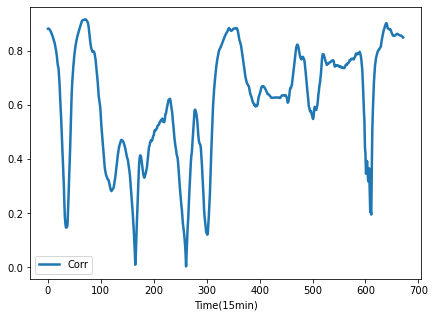

In [7]:
# 画波形图
# >0.6 高度相关； 0.4-0.6中度相关； < 0.4 低度相关
plt.rcParams['figure.figsize']=(7, 5)
plt.plot()
plt.plot()
plt.plot(corr,linewidth=2.5,label='Corr')
plt.xlabel('Time(15min)')
plt.legend(loc='lower left')
plt.savefig('NWP2.jpg',dpi=1000,bbox_inches='tight')

In [8]:
df_corr=pd.DataFrame({'CORR':corr})
High=np.where(df_corr['CORR']>0.6,df_corr['CORR'],None)
Low=np.where(df_corr['CORR']<0.4  ,df_corr['CORR'],None)
Medium=np.where((df_corr['CORR']<=0.6) & (df_corr['CORR']>=0.4)
                ,df_corr['CORR'],None)

In [9]:
High_new=High.copy() # 感觉这样做才是正确的做法
for i in range(1,len(High)-1):
    if High[i-1] != None and High[i] == None:
        High_new[i]=Medium[i]
    elif High[i+1] !=None and High[i] == None:
        High_new[i]=Medium[i] 
    else:
        High_new[i]=High[i]
Low_new=Low.copy() # 这个为什么要这样做，还是有待商榷
for i in range(1,len(Low)-1):
    if Low[i-1] != None and Low[i] == None:
        Low_new[i]=Medium[i]
    elif Low[i+1] !=None and Low[i] == None:
        Low_new[i]=Medium[i]
    else:
        Low_new[i]=Low[i]

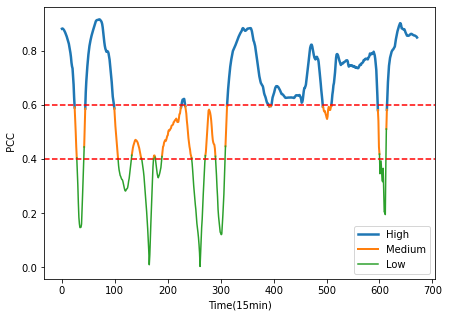

In [10]:
# 画波形图
# >0.6 高度相关； 0.4-0.6中度相关； < 0.4 低度相关
plt.rcParams['figure.figsize']=(7, 5)
plt.plot(High_new,linewidth=2.5,label='High')
plt.plot(Medium,linewidth=2,label='Medium')
plt.plot(Low_new,linewidth=1.5,label='Low')
plt.axhline(y=0.6, color='r', linestyle='--')
plt.axhline(y=0.4, color='r', linestyle='--')
plt.xlabel('Time(15min)')
plt.ylabel(' PCC')
plt.legend(loc='lower right')
plt.savefig('NWP2.svg',dpi=1000,bbox_inches='tight')